<a href="https://colab.research.google.com/github/HHansi/Machine-Learning-CPD-Course/blob/main/Clustering_Household.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

**Can we predict the type of the house or its floor area, knowing the number of family members and income?**

Let's apply K-means clustering on the number of family members and income and see how the identified clusters can be related to the house types.


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load Data

Don't forget to load the cleaned data set.

In [3]:
# Load the data set
df = pd.read_csv("/content/cleaned_home_data.csv")
df.head(5)

,homeid,residents,income_band,hometype,floorarea,average_income
0,59,2,"£90,000 or more",flat,760,90000.0
1,61,2,"£48,600 to £53,999",house_or_bungalow,685,51299.5
2,62,2,"£43,200 to £48,599",flat,815,45899.5
3,64,4,"£66,000 to £77,999",flat,650,71999.5
4,63,2,"£54,000 to £65,999",house_or_bungalow,725,59999.5


Let's filter out the data columns which we are intended to use for our experiments. 

In [4]:
selected_df = df[['residents', 'average_income']]
print(f'Selected data size: {selected_df.shape}')
selected_df.head(5)

Selected data size: (245, 2)


,residents,average_income
0,2,90000.0
1,2,51299.5
2,2,45899.5
3,4,71999.5
4,2,59999.5


In [5]:
selected_df.describe()

,residents,average_income
count,245.000000,245.000000
mean,2.436735,46317.728571
std,1.145679,22926.429010
min,0.000000,10800.000000
25%,2.000000,29699.500000
50%,2.000000,45899.500000
75%,3.000000,59999.500000
max,5.000000,90000.000000


As seen in the above output, we have data from different value ranges (e.g. residents 0-5, average_income 10,800-90,000).

Thus, we need to scale the values, to support the learning process. For this, we can use [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which standardizes features by removing the mean and scaling to unit variance.

In [6]:
# Scale data using StandardScaler
scaler = StandardScaler().fit(selected_df)
scaled_data = scaler.transform(selected_df)

# Print the output of first 5 rows
scaled_data[:5]

array([[-0.38198211,  1.90922419],
       [-0.38198211,  0.21773864],
       [-0.38198211, -0.01827955],
       [ 1.36728175,  1.12247503],
       [-0.38198211,  0.59799017]])

# K-means Clustering

We use [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) for K-means clustering experiments.

For K-means clustering, we have to define the number of clusters as a parameter. We usually use domain knowledge and statistical methods to pick this value. 

For this experiment, without going into more details, let's assume we need to find 2 clusters.

In [7]:
kmeans = KMeans(n_clusters=2, random_state=1234)  # create an instance of the class KMeans, giving number of clusters and random state as parameters
kmeans.fit(scaled_data)  # train model 
 
# predict assigned cluster labels
labels = kmeans.predict(scaled_data)
print(f'predicted clusters:\n {labels}')

predicted clusters:
 [1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1]


We can use centroid details to know about the characteristics of the generated clusters.

In [8]:
# get cluster centroids
centroids = kmeans.cluster_centers_
print(f'cluster centroids:\n {centroids}')

cluster centroids:
 [[-0.56088409 -0.64760973]
 [ 0.65519204  0.75649986]]


Since we used scaled data for the model, centroids are also in scaled formats. 

However, these values will make more sense once they are converted to the normal form.

In [9]:
inverse_scaled_centroids = scaler.inverse_transform(centroids)  # inverse scale centroids
print(f'{inverse_scaled_centroids}\n')

# convert complex to real numbers and round off the values
for row in inverse_scaled_centroids:
  real_values = [round(val.real) for val in row]
  print(real_values)

[[1.79545455e+00 3.15006818e+04]
 [3.18584071e+00 6.36261372e+04]]

[2, 31501]
[3, 63626]


Let's plot the clusters in a scatter plot to get an overview.

In [16]:
for n, y in enumerate(inverse_scaled_centroids):
  print(y)

[1.79545455e+00 3.15006818e+04]
[3.18584071e+00 6.36261372e+04]


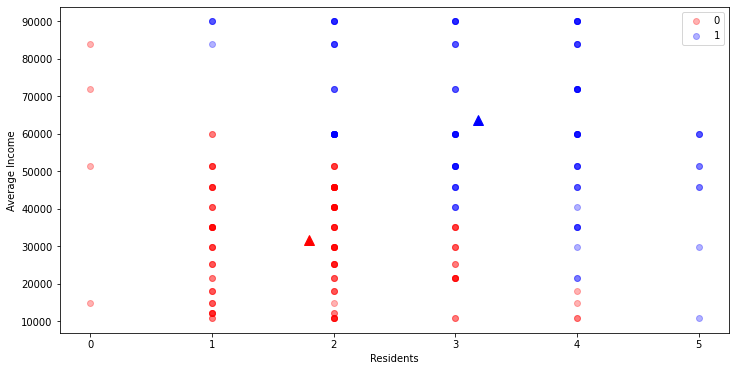

In [18]:
fig = plt.figure(figsize=(12, 6))
colors = ['r', 'b']

# plot data points
n_labels = np.unique(labels)  # count number of unique labels to use with graph
for i in n_labels:
    plt.scatter(selected_df[labels == i].iloc[: , 0] , selected_df[labels == i].iloc[: , 1] , label=i, color=colors[i], alpha=0.3)

# plot centroids
for n, y in enumerate(inverse_scaled_centroids):
  plt.plot(y[0], y[1], marker='^', color=colors[n], ms=10)

plt.xlabel("Residents")
plt.ylabel("Average Income")

plt.legend()
plt.show()

<font size=4 color="blue">**Q.** How can you explain the properties/ characteristics of each clsuter? <font>

As the next step, let's see how the identified clusters can be related to the house types.

By drawing a scatter plot (similar to the above) separating the house types: flat and house_or_bungalow, we will be able to see the similarities to the identified clusters.

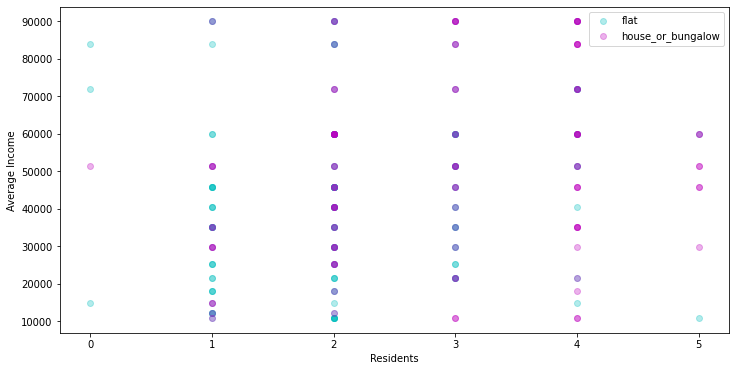

In [19]:
fig = plt.figure(figsize=(12, 6))

plt.scatter(df.loc[df['hometype'] == 'flat']['residents'] , df.loc[df['hometype'] == 'flat']['average_income'], label='flat', color='c', alpha=0.3)
plt.scatter(df.loc[df['hometype'] == 'house_or_bungalow']['residents'] , df.loc[df['hometype'] == 'house_or_bungalow']['average_income'] , label='house_or_bungalow', color='m', alpha=0.3)

plt.xlabel("Residents")
plt.ylabel("Average Income")

plt.legend()
plt.show()